In [5]:
from dataset import FakeNewsDataset

c:\Users\hayl0\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
train, test, validation = FakeNewsDataset.getData()

features = ['Analytic', 'Clout', 'Authentic', 'Tone'] 
response = 'label' 

x_train = train[features] 
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [7]:
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from sklearn import model_selection, preprocessing
from keras import models, layers, optimizers, regularizers

import json

In [8]:
hidden_units = 30     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update


# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='softmax'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/10
642/642 [==============================] - 1s 1ms/step - loss: -1193.4998 - accuracy: 0.2067
Epoch 2/10
642/642 [==============================] - 1s 1ms/step - loss: -8720.8965 - accuracy: 0.2067
Epoch 3/10
642/642 [==============================] - 1s 1ms/step - loss: -23142.3574 - accuracy: 0.2067
Epoch 4/10
642/642 [==============================] - 1s 1ms/step - loss: -44003.1758 - accuracy: 0.2067
Epoch 5/10
642/642 [==============================] - 1s 1ms/step - loss: -70063.8516 - accuracy: 0.2067
Epoch 6/10
642/642 [==============================] - 1s 1ms/step - loss: -100695.4062 - accuracy: 0.2067
Epoch 7/10
642/642 [==============================] - 1s 1ms/step - loss: -135565.4688 - accuracy: 0.2067
Epoch 8/10
642/642 [==============================] - 1s 1ms/step - loss: -174553.0156 - accuracy: 0.2067
Epoch 9/10
642/642 [==============================] - 1s 1ms/step - loss: -217399.2656 - accuracy: 0.2067
Epoch 10/10
41/41 [==============================] - 

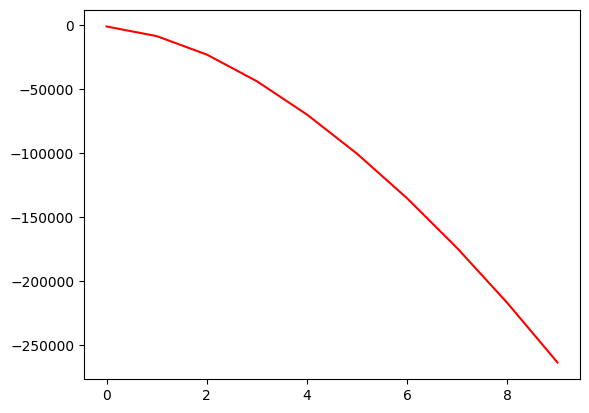

In [9]:
# train the parameters
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


In [10]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Average Training Accuracy: %s' % np.average(train_accs))
    print('Average Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [11]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)


100%|██████████| 20/20 [01:22<00:00,  4.14s/it]

Average Training Accuracy: 0.20673872530460358
Average Testing Accuracy: 0.20810599625110626


In [13]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.20810599625110626
Max: 0.20810599625110626
